In [0]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix
import matplotlib.mlab as mlab


In [0]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"agoel00","key":"e52ac7b2408cb0d205652491e75ee6a6"}'}

In [0]:
!mkdir ~/.kaggle && cp kaggle.json ~/.kaggle

In [0]:
!pip install kaggle

In [0]:
!kaggle datasets download -d amanajmera1/framingham-heart-study-dataset

  0% 0.00/58.0k [00:00<?, ?B/s]
100% 58.0k/58.0k [00:00<00:00, 26.5MB/s]


In [0]:
!unzip framingham-heart-study-dataset

Archive:  framingham-heart-study-dataset.zip
  inflating: framingham.csv          


In [0]:
!ls

framingham.csv	framingham-heart-study-dataset.zip  kaggle.json  sample_data


In [0]:
heart_df = pd.read_csv('./framingham.csv')
heart_df.drop(['education'], axis=1,inplace=True)

In [0]:
heart_df.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [0]:
heart_df.rename(columns={'male':'Sex_male'},inplace=True)

In [0]:
heart_df.isnull().sum()

Sex_male             0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [0]:
count = 0
for i in heart_df.isnull().sum(axis=1):
  if i>0:
    count=count+1
print("Total no of rows with missing values is ", count)


Total no of rows with missing values is  489


In [0]:
heart_df.shape

(4240, 15)

In [0]:
heart_df.dropna(axis=0,inplace=True)

In [0]:
heart_df.shape

(3751, 15)

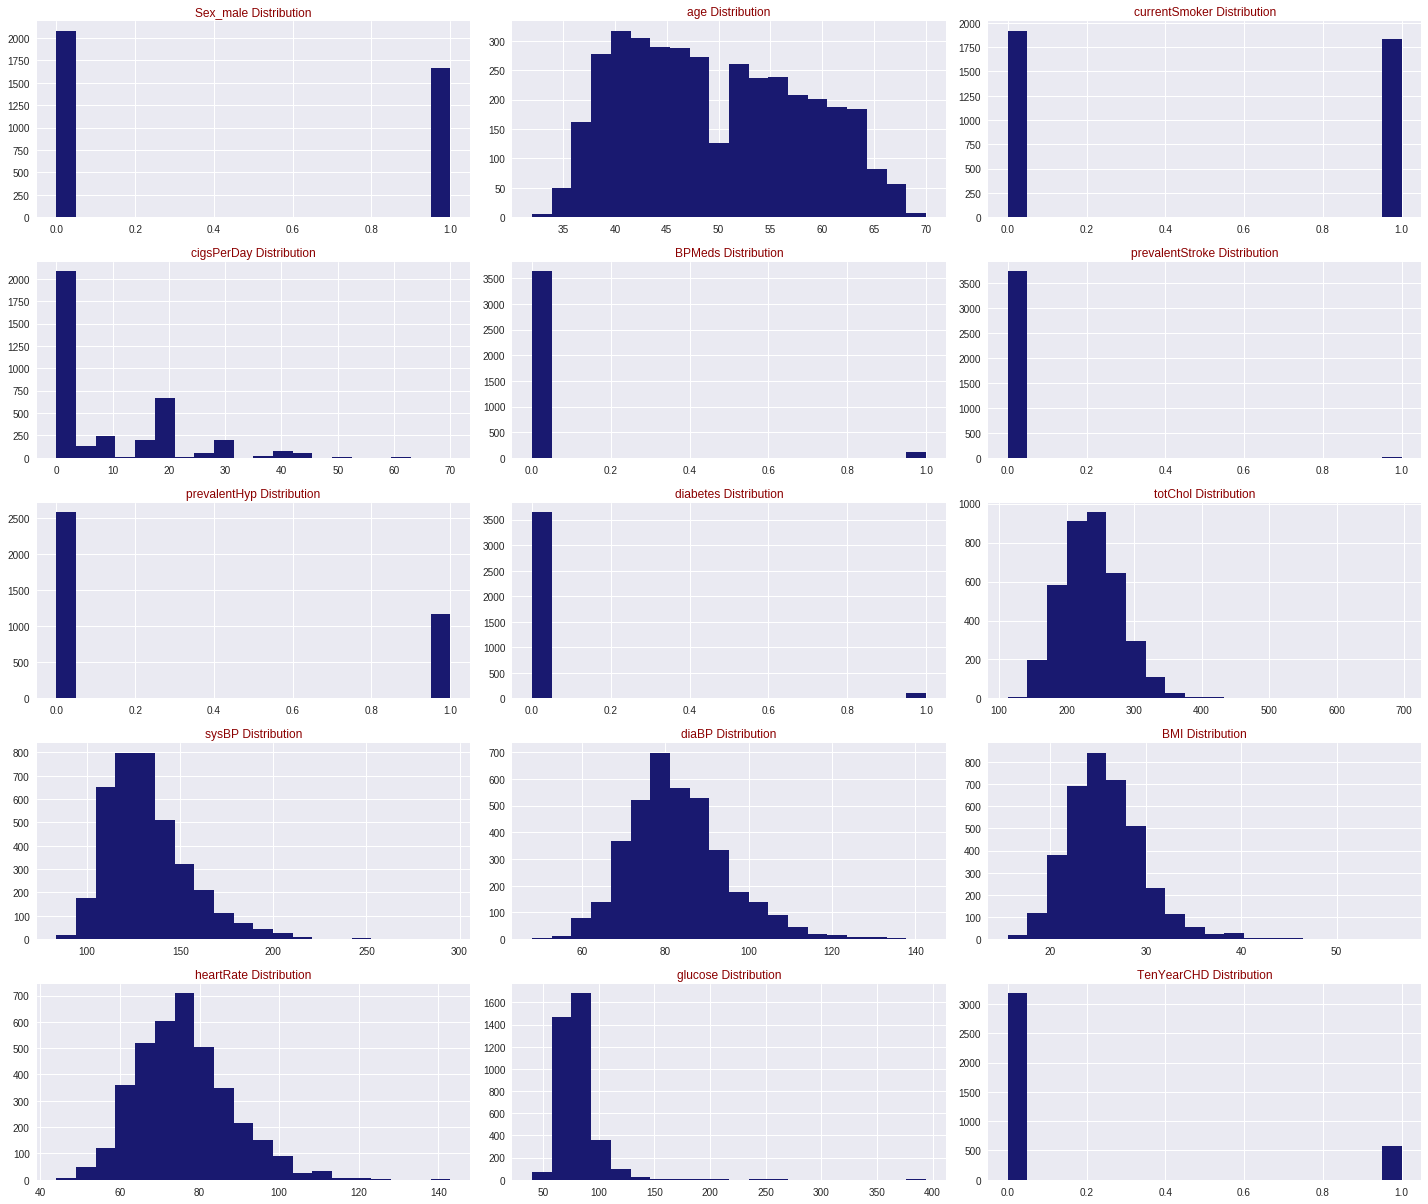

In [0]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        
    fig.tight_layout()  
    plt.show()
draw_histograms(heart_df,heart_df.columns,6,3)

In [0]:
heart_df.TenYearCHD.value_counts()

0    3179
1     572
Name: TenYearCHD, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


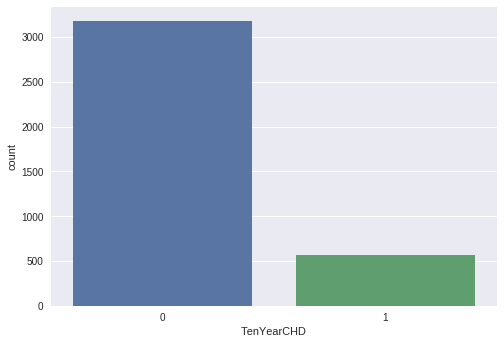

In [0]:
sn.countplot(x='TenYearCHD', data=heart_df)

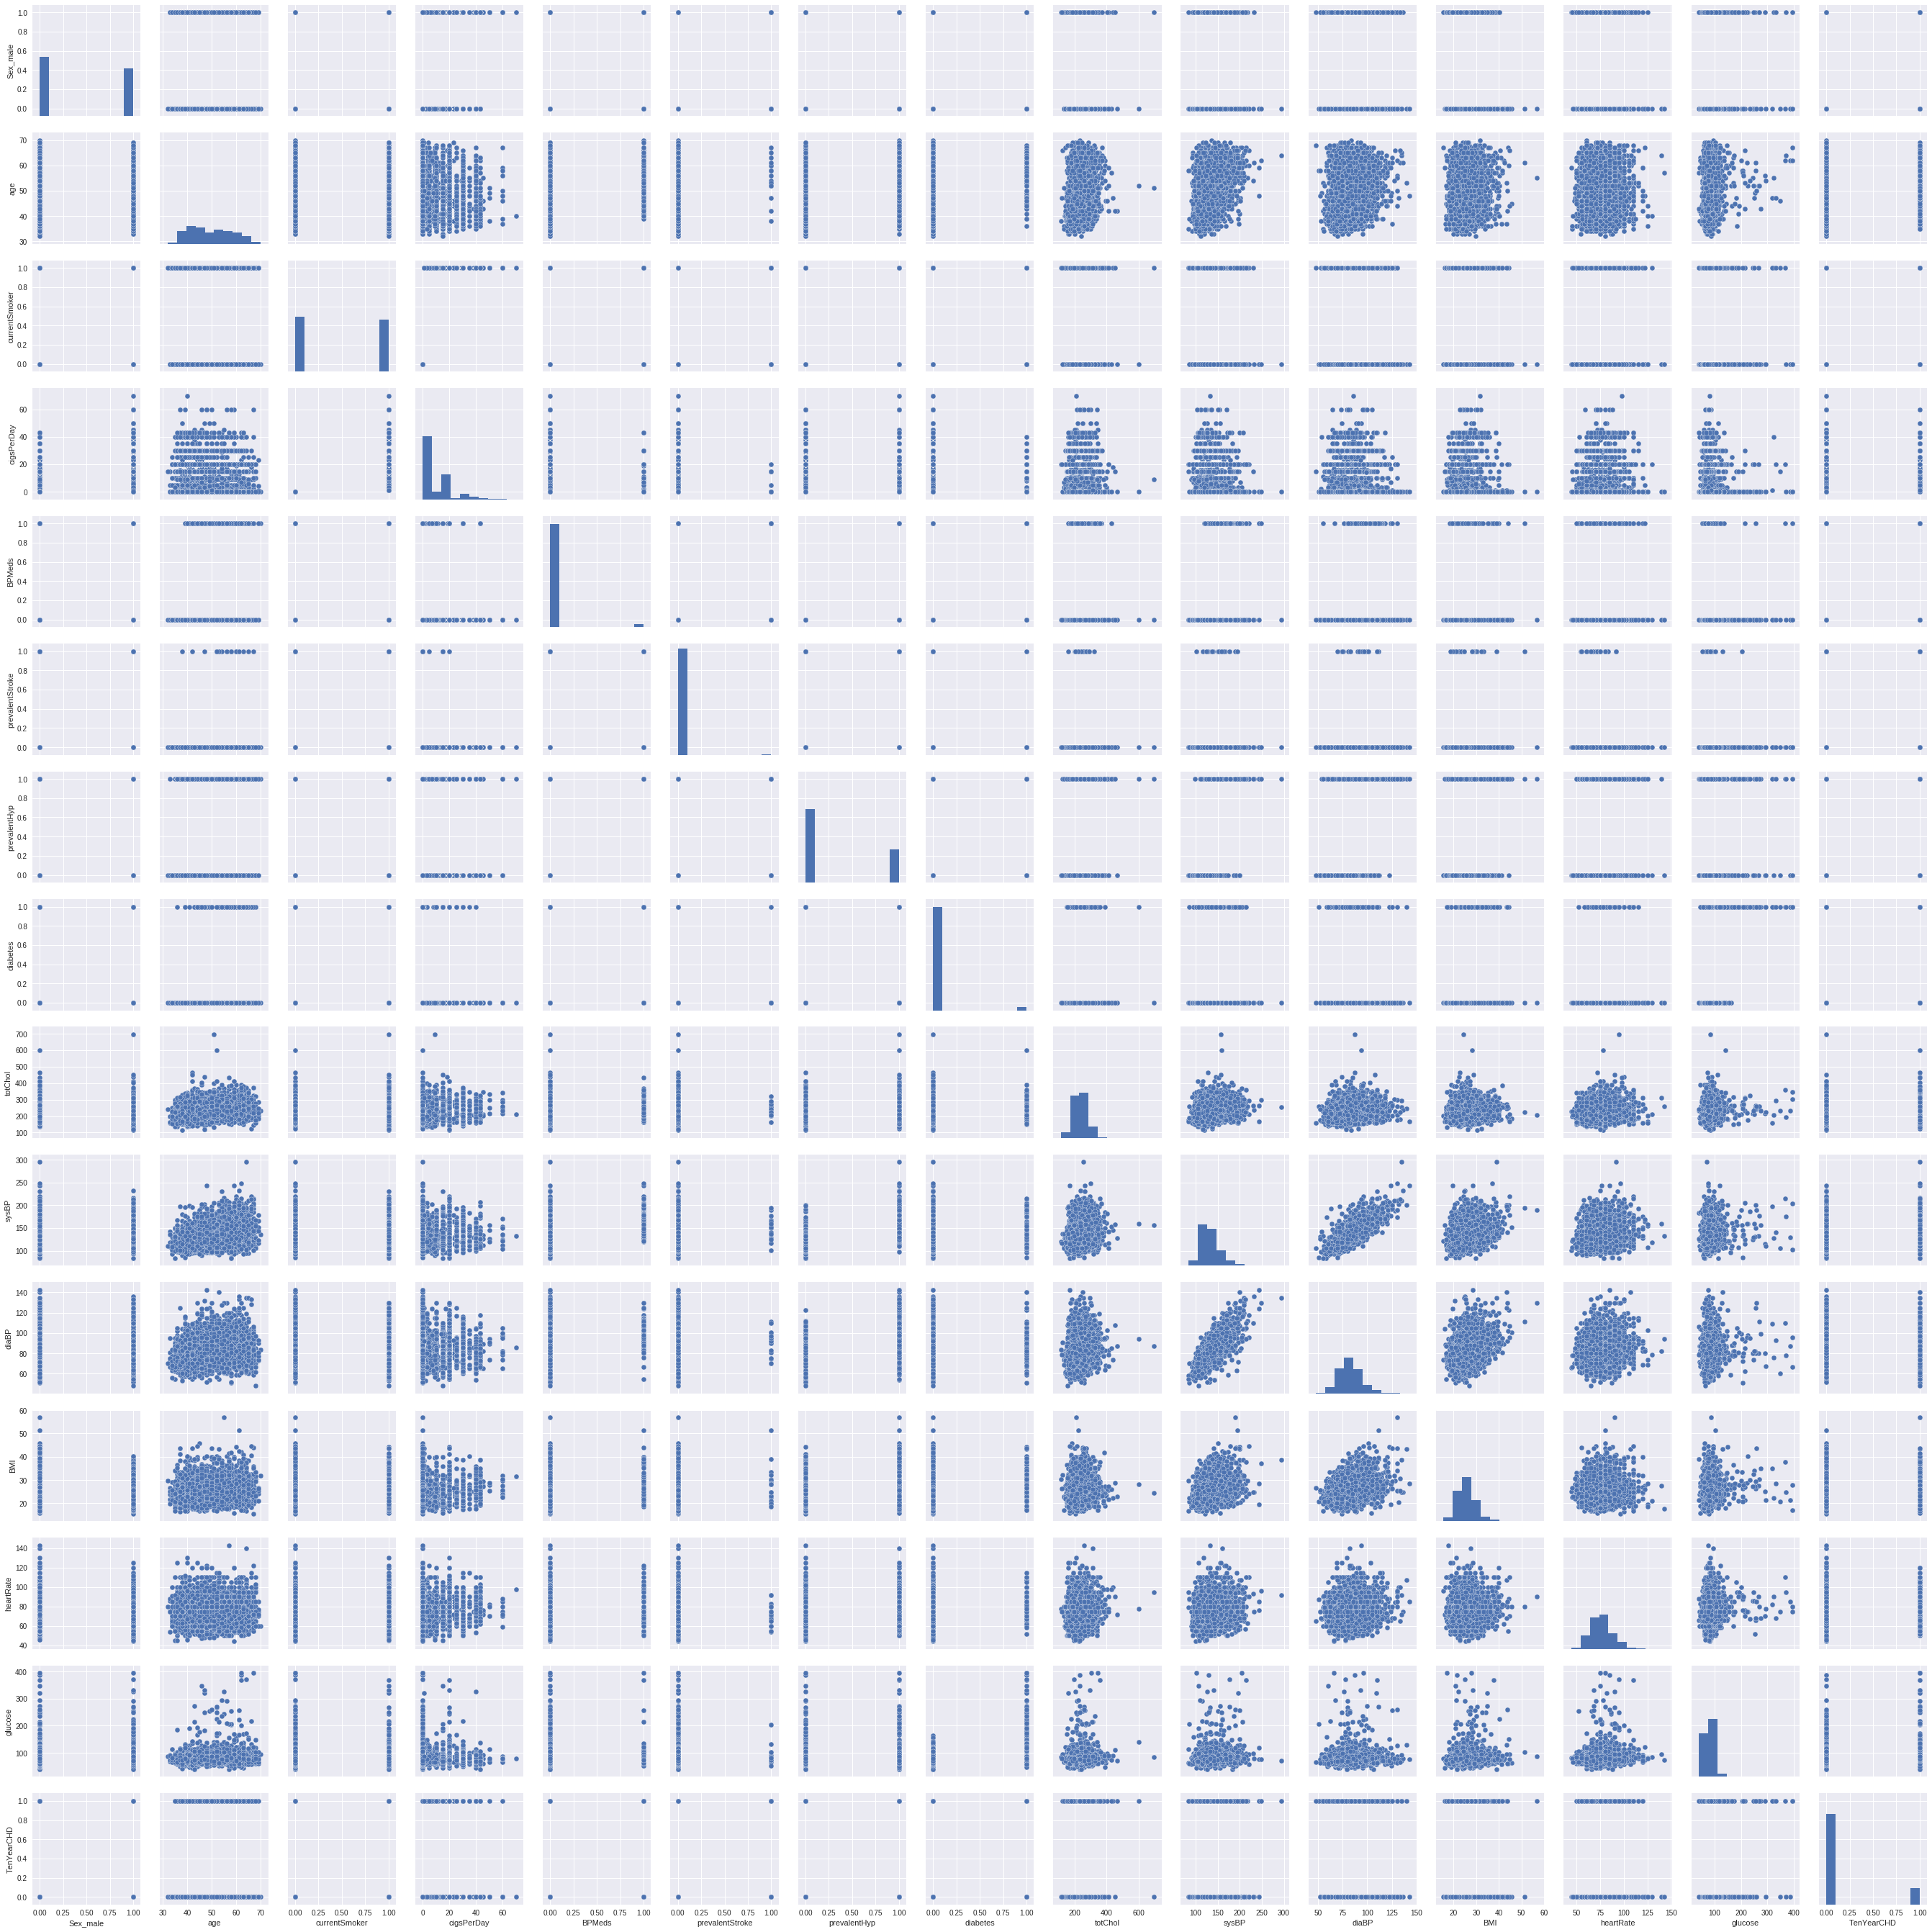

In [0]:
sn.pairplot(data=heart_df)

In [0]:
heart_df.describe()

,Sex_male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000
mean,0.445215,49.573447,0.488403,9.008531,0.030392,0.005599,0.311917,0.027193,236.928019,132.368435,82.938550,25.808288,75.704079,81.880032,0.152493
std,0.497056,8.570204,0.499932,11.925097,0.171686,0.074623,0.463338,0.162666,44.611594,22.046522,11.932779,4.065599,11.956382,23.882233,0.359546
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.085000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.410000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.000000,90.000000,28.060000,82.000000,87.000000,0.000000
max,1.000000,70.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [0]:
from statsmodels.tools import add_constant
heart_df_constant = add_constant(heart_df)
heart_df_constant.head()

,const,Sex_male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1.0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,1.0,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1.0,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,1.0,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,1.0,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [0]:
st.chisqprob = lambda chisq, df: st.chi2.sf(chisq, df)
cols=heart_df_constant.columns[:-1]
model=sm.Logit(heart_df.TenYearCHD,heart_df_constant[cols])
result=model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.377036
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 3751
Model:                          Logit   Df Residuals:                     3736
Method:                           MLE   Df Model:                           14
Date:                Mon, 19 Nov 2018   Pseudo R-squ.:                  0.1170
Time:                        11:11:39   Log-Likelihood:                -1414.3
converged:                       True   LL-Null:                       -1601.7
                                        LLR p-value:                 2.439e-71
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -8.6532      0.687    -12.589      0.000     -10.000      -7.306
Sex_male            0.5742      0.107      5.345      0.000       0.364       0.785
age                 0.0641      0.007      9.799      0.000       0.051       0.077
currentSmoker       0.0739      0.155      0.478      0.633      -0.229       0.377
cigsPerDay          0.0184      0.006      3.000      0.003       0.006       0.030
BPMeds              0.1448      0.232      0.623      0.533      -0.310       0.600
prevalentStroke     0.7193      0.489      1.471      0.141      -0.239       1.678
prevalentHyp        0.2142      0.136      1.571      0.116      -0.053       0.481
diabetes            0.0022      0.312      0.007      0.994      -0.610       0.614
totChol             0.0023      0.001      2.081      0.037       0.000       0.004
sysBP               0.0154      0.004      4.082      0.000       0.008       0.023
diaBP              -0.0040      0.006     -0.623      0.533      -0.016       0.009
BMI                 0.0103      0.013      0.827      0.408      -0.014       0.035
heartRate          -0.0023      0.004     -0.549      0.583      -0.010       0.006
glucose             0.0076      0.002      3.409      0.001       0.003       0.012
===================================================================================
"""

In [0]:
def back_feature_elem (data_frame,dep_var,col_list):
    """ Takes in the dataframe, the dependent variable and a list of column names, runs the regression repeatedly eleminating feature with the highest
    P-value above alpha one at a time and returns the regression summary with all p-values below alpha"""

    while len(col_list)>0 :
        model=sm.Logit(dep_var,data_frame[col_list])
        result=model.fit(disp=0)
        largest_pvalue=round(result.pvalues,3).nlargest(1)
        if largest_pvalue[0]<(0.05):
            return result
            break
        else:
            col_list=col_list.drop(largest_pvalue.index)

result=back_feature_elem(heart_df_constant,heart_df.TenYearCHD,cols)

In [0]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 3751
Model:                          Logit   Df Residuals:                     3744
Method:                           MLE   Df Model:                            6
Date:                Mon, 19 Nov 2018   Pseudo R-squ.:                  0.1149
Time:                        11:12:10   Log-Likelihood:                -1417.7
converged:                       True   LL-Null:                       -1601.7
                                        LLR p-value:                 2.127e-76
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.1264      0.468    -19.504      0.000     -10.043      -8.209
Sex_male       0.5815      0.105      5.524      0.000       0.375       0.788
age            0.0655      0.006     10.343      0.000       0.053       0.078
cigsPerDay     0.0197      0.004      4.805      0.000       0.012       0.028
totChol        0.0023      0.001      2.106      0.035       0.000       0.004
sysBP          0.0174      0.002      8.162      0.000       0.013       0.022
glucose        0.0076      0.002      4.574      0.000       0.004       0.011
==============================================================================
"""

In [0]:
params = np.exp(result.params)
conf = np.exp(result.conf_int())
conf['OR'] = params
pvalue=round(result.pvalues,3)
conf['pvalue']=pvalue
conf.columns = ['CI 95%(2.5%)', 'CI 95%(97.5%)', 'Odds Ratio','pvalue']
print ((conf))

            CI 95%(2.5%)  CI 95%(97.5%)  Odds Ratio  pvalue
const           0.000043       0.000272    0.000109   0.000
Sex_male        1.455242       2.198536    1.788687   0.000
age             1.054483       1.080969    1.067644   0.000
cigsPerDay      1.011733       1.028128    1.019897   0.000
totChol         1.000158       1.004394    1.002273   0.035
sysBP           1.013292       1.021784    1.017529   0.000
glucose         1.004346       1.010898    1.007617   0.000


In [0]:
import sklearn
new_features=heart_df[['age','Sex_male','cigsPerDay','totChol','sysBP','glucose','TenYearCHD']]
x=new_features.iloc[:,:-1]
y=new_features.iloc[:,-1]
from sklearn.cross_validation import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=5)

/usr/local/lib/python3.6/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [0]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)


In [0]:
sklearn.metrics.accuracy_score(y_test,y_pred)

0.881491344873502

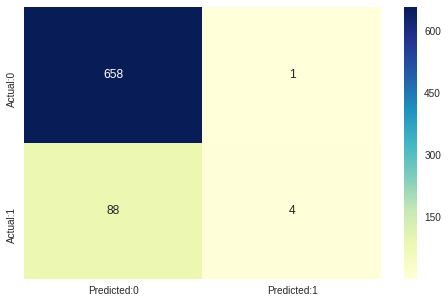

In [0]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sn.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [0]:
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)

In [0]:
print('The acuuracy of the model = TP+TN/(TP+TN+FP+FN) = ',(TP+TN)/float(TP+TN+FP+FN),'\n',

'The Missclassification = 1-Accuracy = ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n',

'Sensitivity or True Positive Rate = TP/(TP+FN) = ',TP/float(TP+FN),'\n',

'Specificity or True Negative Rate = TN/(TN+FP) = ',TN/float(TN+FP),'\n',

'Positive Predictive value = TP/(TP+FP) = ',TP/float(TP+FP),'\n',

'Negative predictive Value = TN/(TN+FN) = ',TN/float(TN+FN),'\n',

'Positive Likelihood Ratio = Sensitivity/(1-Specificity) = ',sensitivity/(1-specificity),'\n',

'Negative likelihood Ratio = (1-Sensitivity)/Specificity = ',(1-sensitivity)/specificity)

The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =  0.881491344873502 
 The Missclassification = 1-Accuracy =  0.118508655126498 
 Sensitivity or True Positive Rate = TP/(TP+FN) =  0.043478260869565216 
 Specificity or True Negative Rate = TN/(TN+FP) =  0.9984825493171472 
 Positive Predictive value = TP/(TP+FP) =  0.8 
 Negative predictive Value = TN/(TN+FN) =  0.8820375335120644 
 Positive Likelihood Ratio = Sensitivity/(1-Specificity) =  28.65217391304351 
 Negative likelihood Ratio = (1-Sensitivity)/Specificity =  0.9579754195850403


In [0]:
y_pred_prob=logreg.predict_proba(x_test)[:,:]
y_pred_prob_df=pd.DataFrame(data=y_pred_prob, columns=['Prob of no heart disease (0)','Prob of Heart Disease (1)'])
y_pred_prob_df.head()

,Prob of no heart disease (0),Prob of Heart Disease (1)
0,0.859991,0.140009
1,0.930989,0.069011
2,0.792031,0.207969
3,0.814827,0.185173
4,0.875303,0.124697


In [0]:
from sklearn.preprocessing import binarize
for i in range(1,5):
    cm2=0
    y_pred_prob_yes=logreg.predict_proba(x_test)
    y_pred2=binarize(y_pred_prob_yes,i/10)[:,1]
    cm2=confusion_matrix(y_test,y_pred2)
    print ('With',i/10,'threshold the Confusion Matrix is ','\n',cm2,'\n',
            'with',cm2[0,0]+cm2[1,1],'correct predictions and',cm2[1,0],'Type II errors( False Negatives)','\n\n',
          'Sensitivity: ',cm2[1,1]/(float(cm2[1,1]+cm2[1,0])),'Specificity: ',cm2[0,0]/(float(cm2[0,0]+cm2[0,1])),'\n\n\n')
    

With 0.1 threshold the Confusion Matrix is  
 [[240 419]
 [ 11  81]] 
 with 321 correct predictions and 11 Type II errors( False Negatives) 

 Sensitivity:  0.8804347826086957 Specificity:  0.36418816388467373 



With 0.2 threshold the Confusion Matrix is  
 [[519 140]
 [ 43  49]] 
 with 568 correct predictions and 43 Type II errors( False Negatives) 

 Sensitivity:  0.532608695652174 Specificity:  0.787556904400607 



With 0.3 threshold the Confusion Matrix is  
 [[617  42]
 [ 70  22]] 
 with 639 correct predictions and 70 Type II errors( False Negatives) 

 Sensitivity:  0.2391304347826087 Specificity:  0.936267071320182 



With 0.4 threshold the Confusion Matrix is  
 [[652   7]
 [ 86   6]] 
 with 658 correct predictions and 86 Type II errors( False Negatives) 

 Sensitivity:  0.06521739130434782 Specificity:  0.9893778452200304 





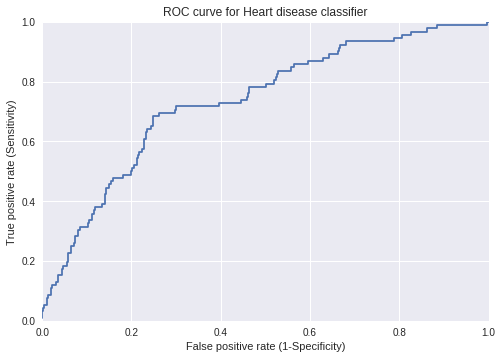

In [0]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_yes[:,1])
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Heart disease classifier')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

In [0]:
sklearn.metrics.roc_auc_score(y_test,y_pred_prob_yes[:,1])

0.7355182423962524

In [0]:
heart_df.head()

,Sex_male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [0]:
x=heart_df.iloc[:,:-1]
y=heart_df.iloc[:,-1]


In [0]:
from sklearn.cross_validation import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=5)

In [0]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

logreg.fit(x_train,y_train)

y_pred = logreg.predict(x_test)


In [0]:
sklearn.metrics.accuracy_score(y_test,y_pred)

0.8801597869507324

In [0]:
np.count_nonzero(y_test)

92

In [0]:
np.count_nonzero(y_pred)

10

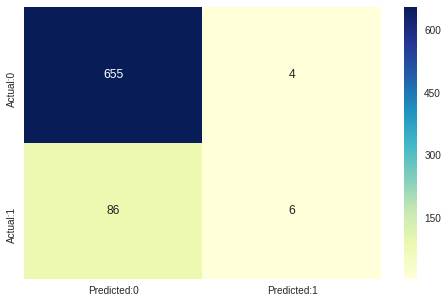

In [0]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sn.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [0]:
logreg

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [0]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=1000)

logreg.fit(x_train,y_train)

y_pred = logreg.predict(x_test)



In [0]:
sklearn.metrics.accuracy_score(y_test,y_pred)

0.8801597869507324

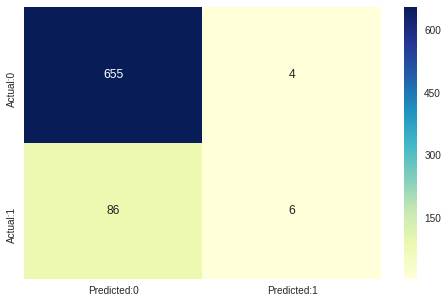

In [0]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sn.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [0]:
x_train.head()

,Sex_male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
1228,0,41,1,3.0,0.0,0,0,0,226.0,130.0,80.0,25.25,75.0,73.0
2503,1,43,1,20.0,0.0,0,0,1,309.0,124.0,85.0,26.91,70.0,215.0
3460,0,62,0,0.0,0.0,0,1,0,312.0,156.0,105.0,22.35,77.0,82.0
4114,0,65,0,0.0,0.0,0,0,0,280.0,115.0,73.0,19.76,65.0,58.0
4029,1,60,1,1.0,1.0,0,1,0,232.0,173.0,106.0,28.63,85.0,64.0


In [0]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_df = scaler.fit_transform(heart_df)

In [0]:
scaled_df

array([[ 1.11629198, -1.23390951, -0.97706903, ...,  0.35934732,
        -0.20436458, -0.4241825 ],
       [-0.89582297, -0.4170173 , -0.97706903, ...,  1.61407468,
        -0.24624229, -0.4241825 ],
       [ 1.11629198, -0.18361952,  1.02346914, ..., -0.05889514,
        -0.49750858, -0.4241825 ],
       ...,
       [-0.89582297,  0.28317603, -0.97706903, ...,  0.35934732,
         1.05196682, -0.4241825 ],
       [ 1.11629198, -1.11721063, -0.97706903, ..., -0.72808307,
        -0.41375315, -0.4241825 ],
       [-0.89582297, -1.23390951,  1.02346914, ...,  0.77758977,
        -0.07873144, -0.4241825 ]])

starting anew


In [0]:
import pandas as pd

In [0]:
heart_df = pd.read_csv('framingham.csv')

In [0]:
heart_df.drop(['education'], axis=1,inplace=True)

In [0]:
heart_df.tail()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
4235,0,48,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0
4239,0,39,1,30.0,0.0,0,0,0,196.0,133.0,86.0,20.91,85.0,80.0,0


In [0]:
heart_df.rename(columns={'male':'Sex_male'},inplace=True)


In [0]:
count=0
for i in heart_df.isnull().sum(axis=1):
    if i>0:
        count=count+1
print('Total number of rows with missing values is ', count)
print('since it is only',round((count/len(heart_df.index))*100), 'percent of the entire dataset the rows with missing values are excluded.')

Total number of rows with missing values is  489
since it is only 12 percent of the entire dataset the rows with missing values are excluded.


In [0]:
heart_df.dropna(axis=0,inplace=True)

In [0]:
new_features=heart_df[['age','Sex_male','cigsPerDay','totChol','sysBP','diabetes','diaBP','glucose','heartRate','TenYearCHD']]
x=new_features.iloc[:,:-1]
y=new_features.iloc[:,-1]

In [0]:
from sklearn.cross_validation import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=5)

In [0]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [0]:
y_pred = logreg.predict(x_test)

In [0]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.8788282290279628

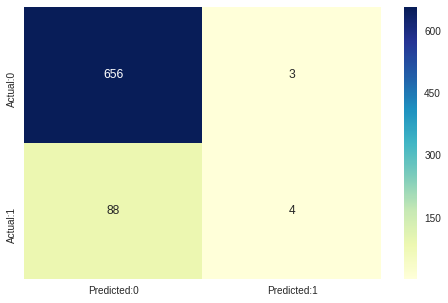

In [0]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sn.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [0]:
x_train.head()

,age,Sex_male,cigsPerDay,totChol,sysBP,diabetes,diaBP,glucose,heartRate
1228,41,0,3.0,226.0,130.0,0,80.0,73.0,75.0
2503,43,1,20.0,309.0,124.0,1,85.0,215.0,70.0
3460,62,0,0.0,312.0,156.0,0,105.0,82.0,77.0
4114,65,0,0.0,280.0,115.0,0,73.0,58.0,65.0
4029,60,1,1.0,232.0,173.0,0,106.0,64.0,85.0


In [0]:
test = [[64,1,20,290,180,1,90,89,98]]

test = np.array(test)

In [0]:
y_test.shape

(751,)

In [0]:
test.shape

(1, 9)

In [0]:
x_test.shape

(751, 9)

In [0]:
logreg.predict(test)

array([1])

In [0]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, max_depth=4)

In [0]:
clf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [0]:
y_pred = clf.predict(x_test)

In [0]:
accuracy_score(y_test, y_pred)

0.8735019973368842

In [0]:
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_).sort_values(ascending=False)
feature_imp

0    0.299947
4    0.204295
7    0.154125
6    0.134668
3    0.071737
2    0.047847
1    0.043177
8    0.028011
5    0.016192
dtype: float64

In [0]:
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index=
                       ['age','Sex_male','cigsPerDay','totChol','sysBP','diabetes','diaBP','glucose','heartRate']
                       ).sort_values(ascending=False)
feature_imp

age           0.299947
sysBP         0.204295
glucose       0.154125
diaBP         0.134668
totChol       0.071737
cigsPerDay    0.047847
Sex_male      0.043177
heartRate     0.028011
diabetes      0.016192
dtype: float64

In [0]:
logreg.coef_

array([[ 0.05173021,  0.50790886,  0.01698911,  0.00103429,  0.01983725,
         0.36530188, -0.01156894,  0.00528644, -0.0120247 ]])

In [0]:
logreg.intercept_

array([-6.23190765])

In [0]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [0]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [0]:
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=5)
	cv_results = model_selection.cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: 0.841667 (0.020669)
LDA: 0.842333 (0.022903)
KNN: 0.828667 (0.024730)
CART: 0.756333 (0.022728)
NB: 0.824333 (0.028286)
SVM: 0.840000 (0.020221)


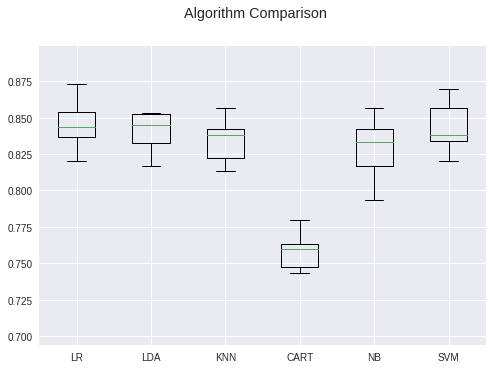

In [0]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

FINAL


In [0]:
import pandas as pd

In [0]:
heart_df = pd.read_csv('framingham.csv')

In [0]:
heart_df.drop(['education'], axis=1,inplace=True)

In [0]:
heart_df.tail()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
4235,0,48,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0
4239,0,39,1,30.0,0.0,0,0,0,196.0,133.0,86.0,20.91,85.0,80.0,0


In [0]:
heart_df.rename(columns={'male':'Sex_male'},inplace=True)


In [0]:
count=0
for i in heart_df.isnull().sum(axis=1):
    if i>0:
        count=count+1
print('Total number of rows with missing values is ', count)
print('since it is only',round((count/len(heart_df.index))*100), 'percent of the entire dataset the rows with missing values are excluded.')

Total number of rows with missing values is  489
since it is only 12 percent of the entire dataset the rows with missing values are excluded.


In [0]:
heart_df.dropna(axis=0,inplace=True)

In [0]:
new_features=heart_df[['age','Sex_male','cigsPerDay','totChol','sysBP','diabetes','diaBP','glucose','heartRate','TenYearCHD']]
x=new_features.iloc[:,:-1]
y=new_features.iloc[:,-1]

In [0]:
from sklearn.cross_validation import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=5)

In [0]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [0]:
y_pred = logreg.predict(x_test)

In [0]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.8788282290279628

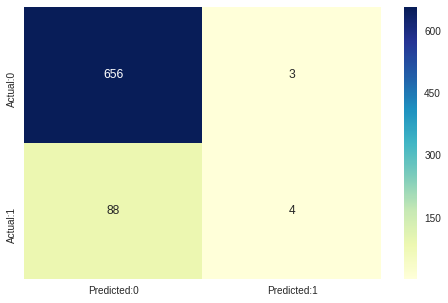

In [0]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sn.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [0]:
from sklearn.externals import joblib


In [0]:
joblib.dump(logreg, 'model.pkl')

['model.pkl']

In [0]:
!ls

framingham.csv			    kaggle.json  sample_data
framingham-heart-study-dataset.zip  logreg.pkl


In [0]:
ls sample_data

anscombe.json*                mnist_test.csv
california_housing_test.csv   mnist_train_small.csv
california_housing_train.csv  README.md*


In [0]:
from google.colab import files
files.download('framingham.csv')